In [1]:
import pandas as pd

dataset_path = 'data/Boston.csv'
dataset = pd.read_csv(dataset_path, sep='[,]', engine='python')
df = dataset.copy()
display(df)

,"""","""""crim""""","""""zn""""","""""indus""""","""""chas""""","""""nox""""","""""rm""""","""""age""""","""""dis""""","""""rad""""","""""tax""""","""""ptratio""""","""""black""""","""""lstat""""","""""medv"""""""
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Подготовим датасет к работе

In [2]:
df.columns = df.columns.str.replace(r'\W', '', regex=True)
df = df.drop(df.columns[[0]], axis=1)
display(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


Построим таблицу корреляции, чтобы выявить нужный признак

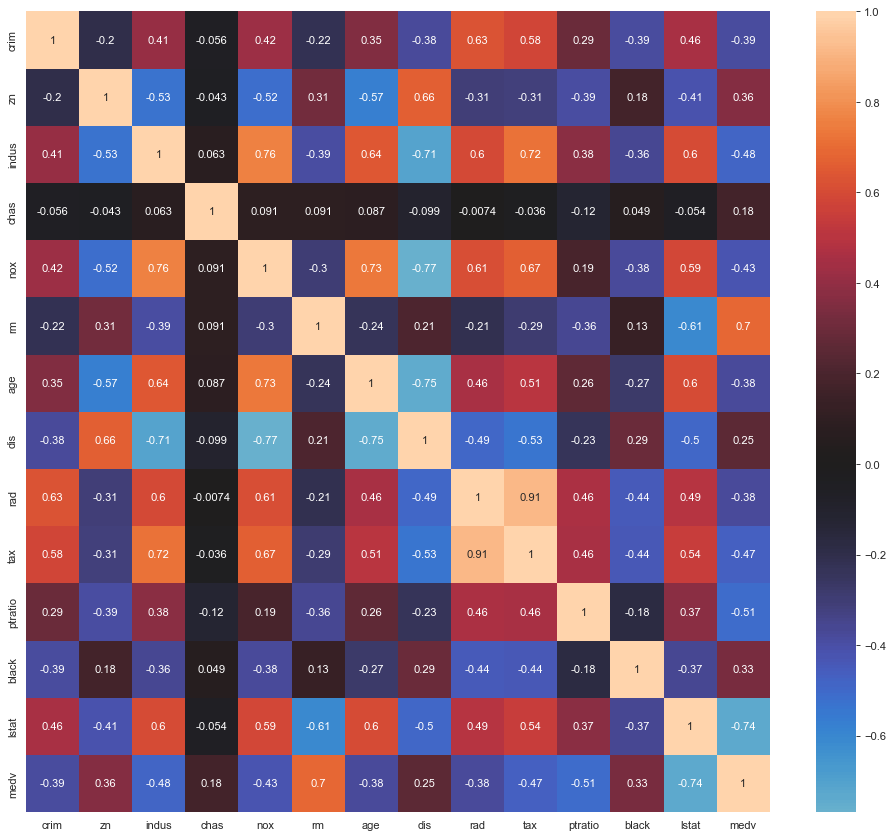

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,13), dpi=80)
sns.heatmap(df.loc[:, 'crim':'medv'].corr(), xticklabels=df.loc[:, 'crim':'medv'].corr().columns, center=0, annot=True)
plt.show()

'lstat' - самый коррелирующий признак, построим график зависимости

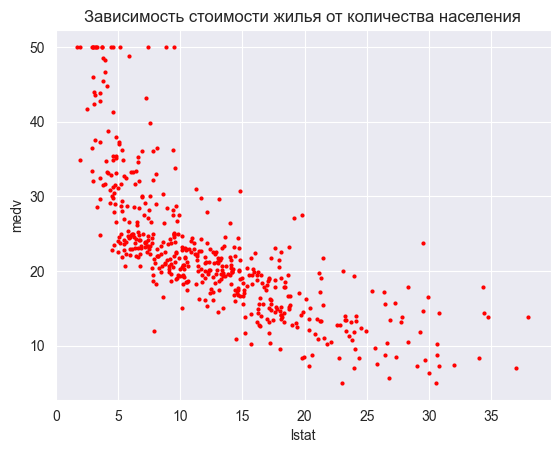

In [23]:
plt.plot(df['lstat'], df['medv'], 'ro', markersize=2)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Зависимость стоимости жилья от количества населения')
plt.show()

Построим модель линейной регрессии с параметром 'lstat'

In [27]:
import statsmodels.formula.api as sm

model = sm.ols('medv ~ lstat', df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           5.08e-88
Time:                        18:29:28   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

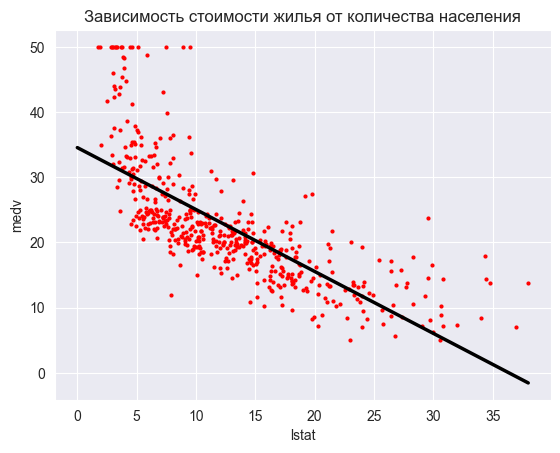

In [37]:
import numpy as np

b, a = np.polyfit(df['lstat'], df['medv'], deg=1)
xseq = np.linspace(0, 38)

plt.plot(df['lstat'], df['medv'], 'ro', markersize=2)
plt.plot(xseq, a + b * xseq, color='k', lw=2.5)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Зависимость стоимости жилья от количества населения')
plt.show()

Построим модель линейной регрессии со всеми параметрами

In [38]:
model = sm.ols('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat', df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          6.72e-135
Time:                        18:49:54   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0